In [284]:
#######   EV CARS PRICE PREDICTION            

In [1]:
########  OBJECTIVE

#   The objective of this project is to develop a Predictive model to forecast the price of electric cars 
#   based on their specifications and historic pricing data. The dataset contains information about various electric car models,
#   including features like vehicle type, CAFV eligibility, electric range, base MSRP and other relevant attributes that could 
#   influence the car price.
   

In [2]:
### PROBLEM STATEMENT 

#      Which variables are significant in predicting the price of a car?
#      How well those variables describe the price of a car?

In [3]:
#  The project aims to achieve the following goals:

#     Data collection and preprocessing 
#     EDA
#     Visualization 
#     Feature selection 
#     Model development 
#     Model evaluation
#     Model Validation
#     Deployment  & Reporting

In [4]:
### IMPORT LIBRARIES 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from scipy import stats
from sklearn.impute import SimpleImputer


In [2]:
### IMPORT DATA

In [3]:
data = pd.read_csv("C:\\Users\\RAJESH KUMAR\\Desktop\\train.csv")


In [4]:
data.head(5)

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [6]:
##### Treating Expected Price ($1k) column (coverting from object to float)

In [7]:
# Replace 'N/' with NaN and then make the column type as float
data['Expected Price ($1k)'] = data['Expected Price ($1k)'].replace('N/', np.nan).astype(float)

In [8]:
data.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Expected Price ($1k)
count,64347.000000,64346.000000,64353.000000,64353.000000,64184.000000,6.435300e+04,64340.000000
mean,98143.452888,2018.186212,106.948985,2524.990754,29.951904,1.972905e+08,45.447970
std,2856.064329,2.726742,104.093919,12402.895104,14.661124,1.069466e+08,24.728205
min,745.000000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03,0.000000
25%,98052.000000,2017.000000,14.000000,0.000000,19.000000,1.372865e+08,22.857000
50%,98121.000000,2018.000000,73.000000,0.000000,34.000000,1.753776e+08,40.000000
75%,98370.000000,2021.000000,215.000000,0.000000,43.000000,2.299039e+08,65.900000
max,99701.000000,2022.000000,337.000000,845000.000000,49.000000,4.789346e+08,1100.000000


In [9]:
##### DATA PREPROCESSING #####################################################################################################

In [10]:
##### TREATING NULL VALUES ######

In [11]:
data.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [12]:
# fill null values with mean value
data['Expected Price ($1k)'].fillna(data['Expected Price ($1k)'].mean(), inplace=True)

In [13]:
#  fill null values in categorical columns with mode
columns_to_fill = ['Vehicle Location','Electric Utility','County','City','State',
                   'ZIP Code','Model Year','Make','Model','Legislative District']                                               

# Fill null values in the selected columns with mode value
for col in columns_to_fill:
    mode_value = data[col].mode()[0]  # Get the mode value
    data[col].fillna(mode_value, inplace=True)

In [14]:
data.isnull().sum()

ID                                                   0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
Expected Price ($1k)                                 0
dtype: int

In [15]:
#### Feature Reduction 
## removing irrelevant features can improve model performance by reducing noise 
##  and focusing on the most important information. 

In [16]:
column_to_drop =['Base MSRP','ZIP Code','DOL Vehicle ID']   ## removed Zip code and DOL vehicle Id from this list

In [17]:
data.drop(column_to_drop, axis=1, inplace=True)

In [18]:
## Numeric columns
numeric_columns=['Electric Range','Legislative District','Model Year','Expected Price ($1k)']


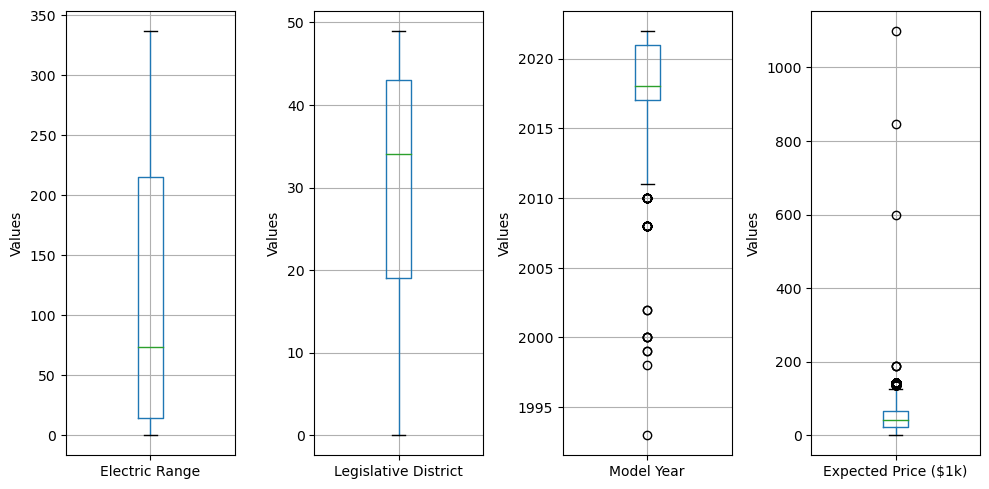

In [19]:
# Create boxplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(10, 5))

for i, column in enumerate(numeric_columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [20]:
## TREATING OUTLIERS 

In [21]:
selected_columns=['Model Year','Expected Price ($1k)']

In [22]:
# Define a function to treat outliers using percentiles
def treat_outliers_percentile(column, lower_percentile=0.25, upper_percentile=0.75):
    q1 = column.quantile(lower_percentile)
    q3 = column.quantile(upper_percentile)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = np.where(column < lower_bound, q1, column)
    column = np.where(column > upper_bound, q3, column)
    return column

In [23]:
# Treat outliers in selected columns using percentiles
for column in selected_columns:
    data[column] = treat_outliers_percentile(data[column])

In [24]:
### Treating outliers by imputing upper and lower bounds

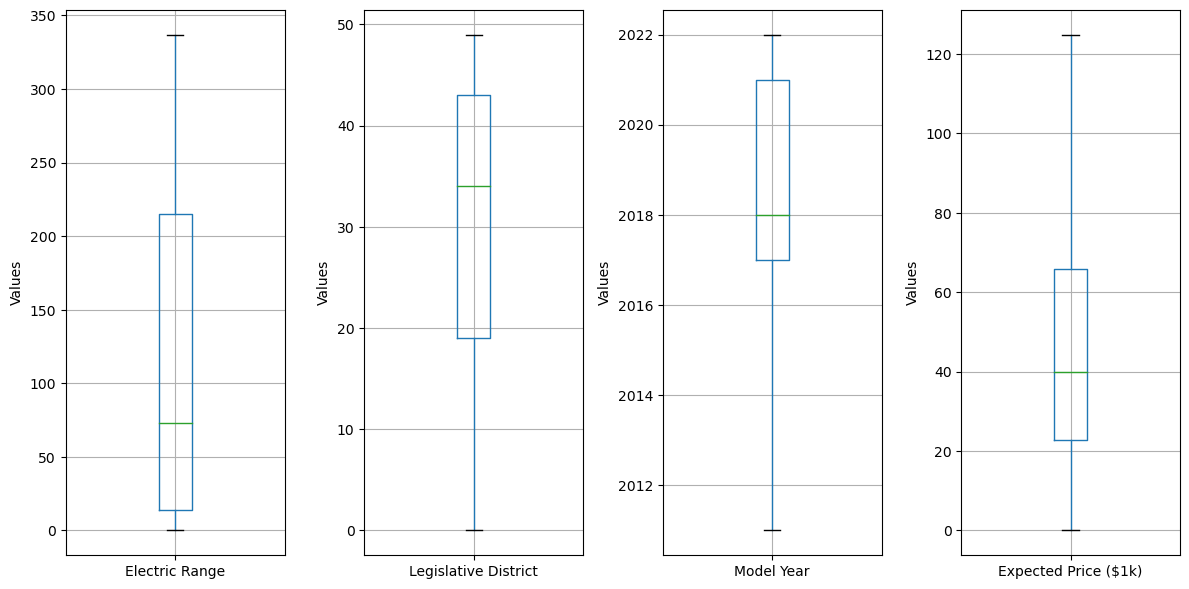

In [25]:
# Create subplots for selected columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(12, 6))

for i, column in enumerate(numeric_columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [26]:
##############################################################################################################################

In [27]:
#### FEATURE ENGINEERING 

In [28]:
###In our dataset, the Vehicle Location column contains both latitude and longitude coordinates as a string.
#### To make these coordinates more accessible for further analysis, we will perform the following feature engineering steps:

#Convert the Vehicle Location column to string type.
#Create two new columns in the DataFrame, latitude and longitude.
#Extract latitude and longitude values from the Vehicle Location column and store them in the respective new columns.

In [29]:
import re
import geopandas as gpd

In [30]:
# Convert the 'Vehicle Location' column to string type
data['Vehicle Location'] = data['Vehicle Location'].astype(str)

In [31]:
# Extract the latitude and longitude from the 'Vehicle Location' column
def extract_coordinates(x, index):
    coords = re.findall(r'-?\d+\.\d+', x)
    if len(coords) >= 2:
        return float(coords[index])
    else:
        return None

In [32]:

data['latitude'] = data['Vehicle Location'].apply(lambda x: extract_coordinates(x, 0))
data['longitude'] = data['Vehicle Location'].apply(lambda x: extract_coordinates(x, 1))

data= data.dropna(subset=['latitude', 'longitude'])

In [33]:
### Concatenate city, county, state as location

In [34]:
data['Location'] = data['County'] + ', ' + data['City'] + ', ' + data['State']

In [35]:
### conerting electric range category to a category column

In [36]:
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return "Unknown"
        elif electric_range < 150:
            return "Short"
        elif electric_range < 300:
            return "Medium"
        else:
            return "Long"

    data['Electric_Range_Category'] = data[column].apply(categorize_range)
    return df

data = create_electric_range_category(data, column='Electric Range')


In [37]:
######### VISUALIZATIONS #######

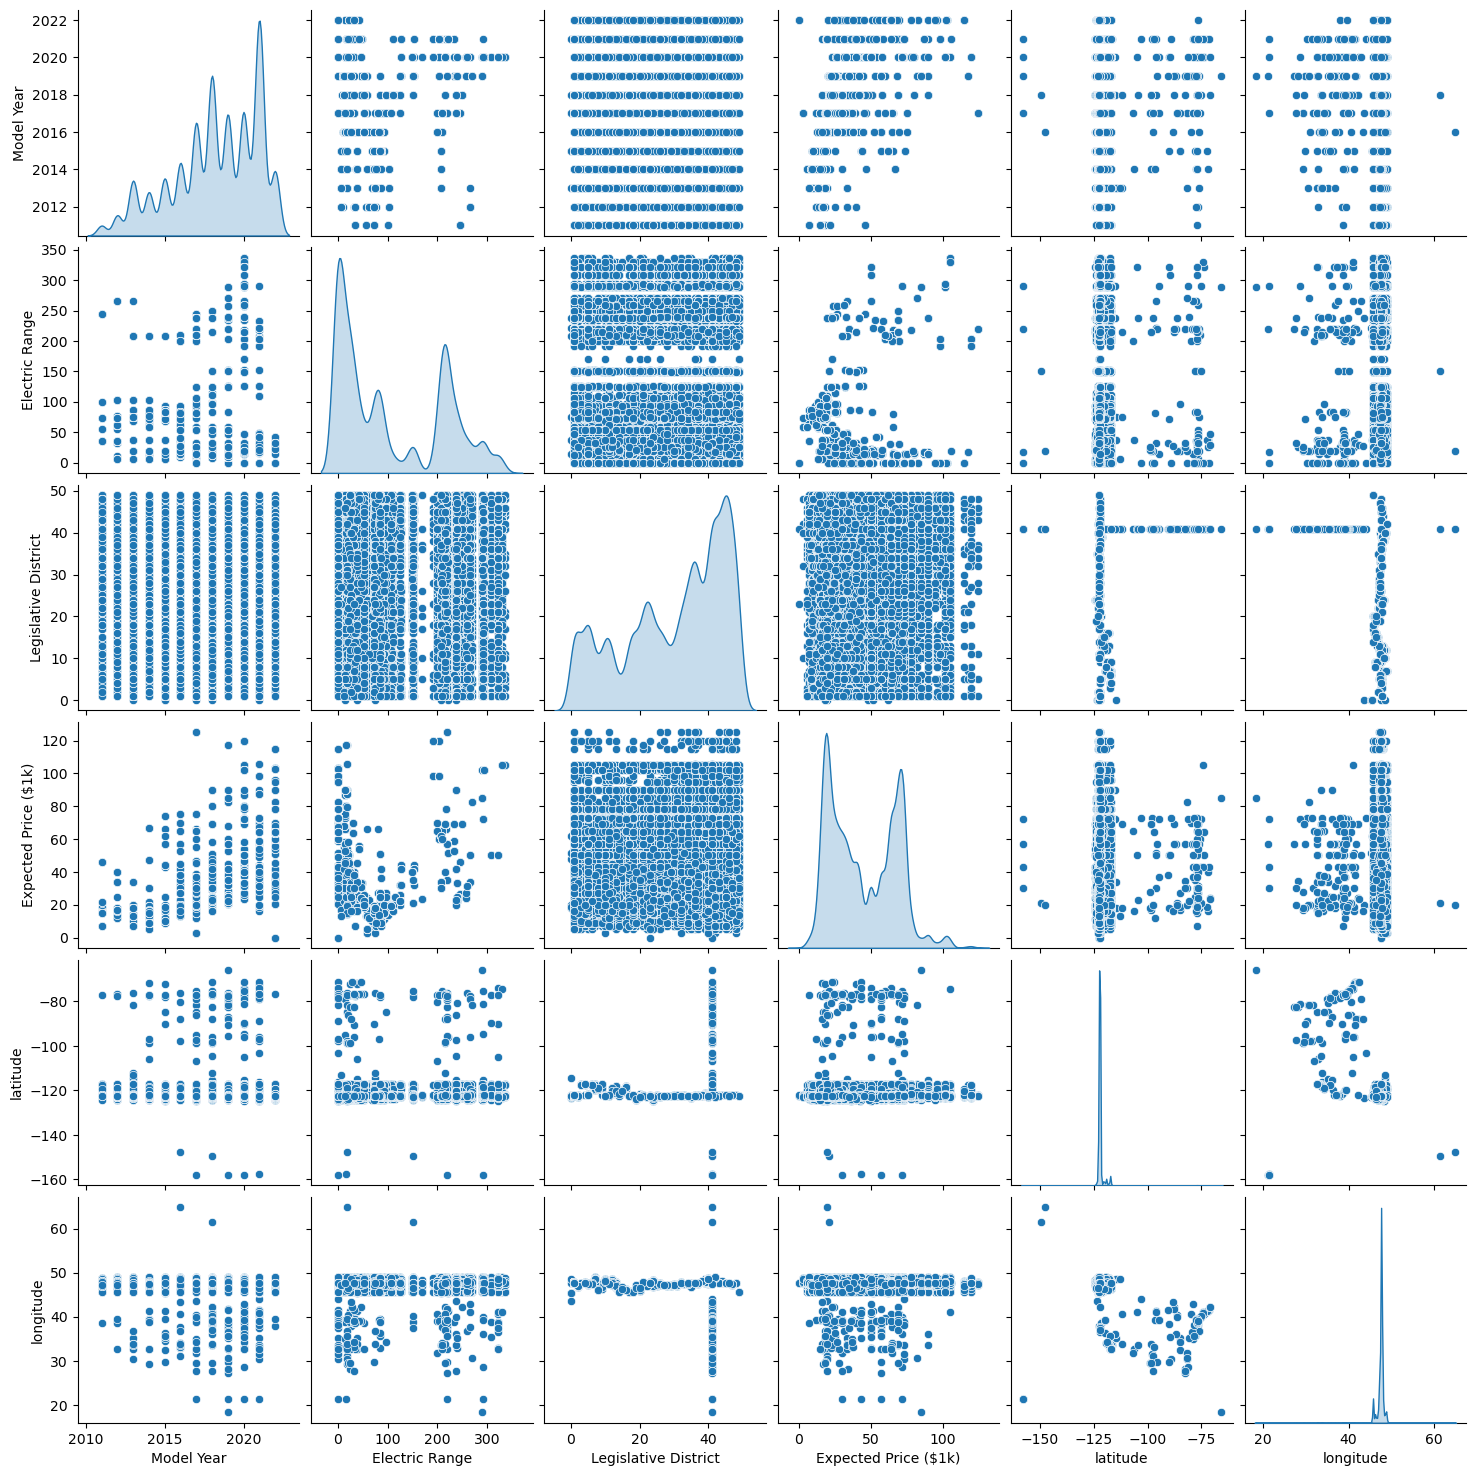

In [38]:
# Create a pairplot
sns.pairplot(data, diag_kind='kde')  # diag_kind='kde' for kernel density plots on the diagonal
plt.show()

C:\Users\RAJESH KUMAR\AppData\Local\Temp\ipykernel_19080\3133334731.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")


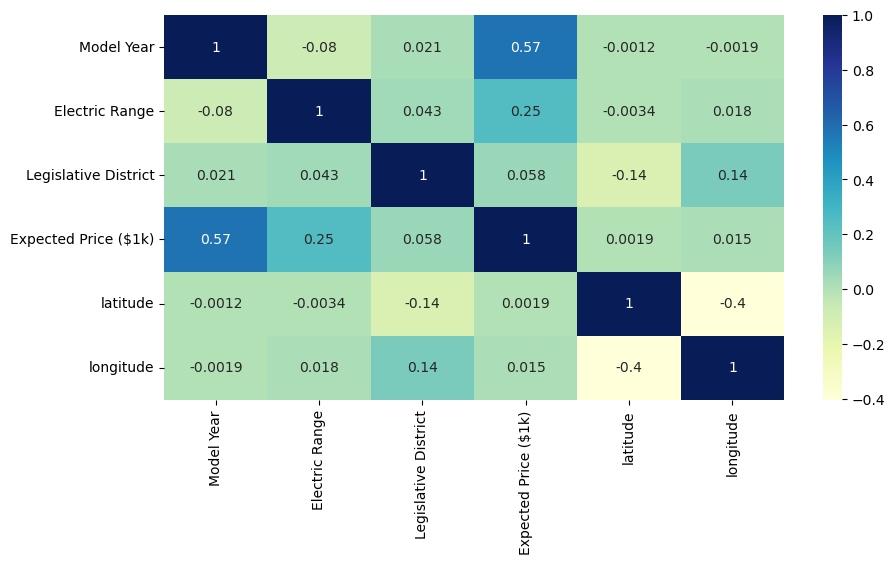

In [39]:
#Correlation using heatmap
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [40]:
## Univariate Analysis

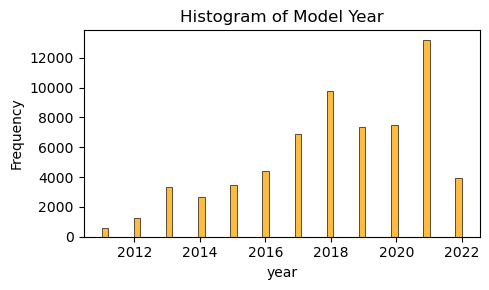

In [41]:
# Create a histogram (histplot) for the model yearvariable using seaborn
plt.figure(figsize=(5,3))  # Set the figure size
sns.histplot(data['Model Year'], kde=False, color='orange')

# Add title and labels
plt.title('Histogram of Model Year')
plt.xlabel('year')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [42]:
# INFERENCE
###  There's a steady rise in EV sales from 2011
###  Post 2018 there's a drop in sales for straight 2 years (could be a COVID impact)
###  Year 2021 witnessed a highest ever sales

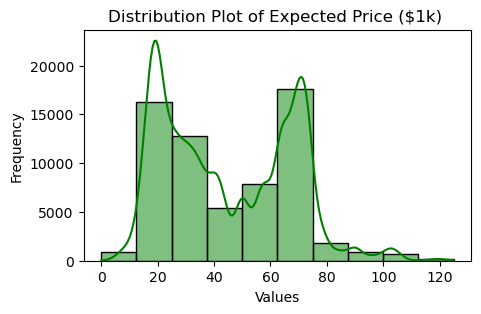

In [43]:
# Create a distribution plot (histogram)
plt.figure(figsize=(5, 3))
sns.histplot(data['Expected Price ($1k)'], bins=10, kde=True,color='green')  
plt.title('Distribution Plot of Expected Price ($1k) ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [44]:
# INFERENCE
### As seen from the above graph, most number of sales was recorded for the vehicles that 
### falls in the price bracket of  10Kto 30K
### Second highest sales was recorded in the price bracket  60Kto 70K

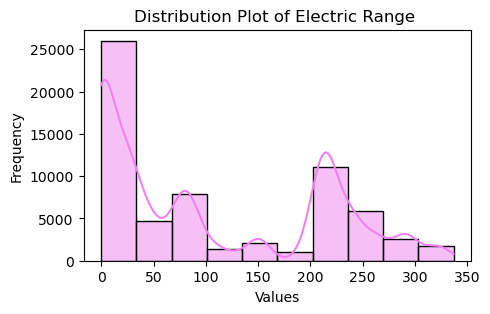

In [45]:
# Create a distribution plot (histogram)
plt.figure(figsize=(5, 3))
sns.histplot(data['Electric Range'], bins=10, kde=True,color='violet')  
plt.title('Distribution Plot of Electric Range ')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [46]:
## INFERENCE
###Highest sold vehichles with respect to Electric range is in the following order:

#     0 to 30
#     200 to 225
#    60 to 80

In [47]:
# Get value counts for each city
city_counts = data['City'].value_counts()

# Select top 10 city
top_10_city = city_counts.head(10)


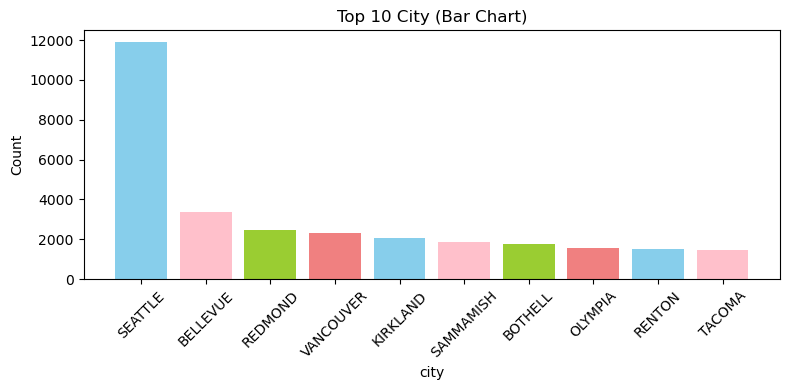

In [48]:
# Create a bar chart
plt.figure(figsize=(8, 4))
plt.bar(top_10_city.index, top_10_city, color=['skyblue','pink', 'yellowgreen', 'lightcoral'])
plt.title('Top 10 City (Bar Chart)')
plt.xlabel('city')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
#  INFERENCE
### Seattle stands way ahead of other cities with highest volume of sales of EV cars with 12K qty.
### The city that ranks second has made a sales that's 1/3rd of Seattle city

In [50]:
# Get value counts of counties
county_counts = data['County'].value_counts()

# Select top 5 counties
top_5_counties = county_counts.head(5)


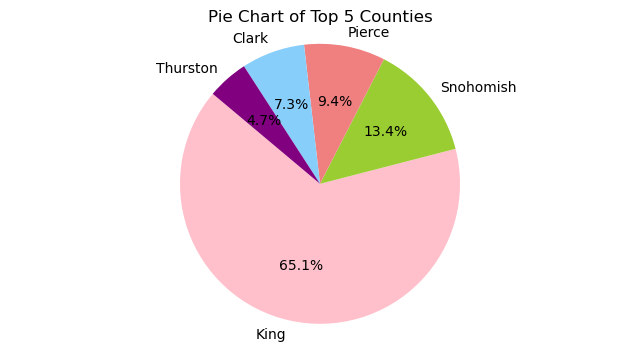

In [51]:
# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(top_5_counties, labels=top_5_counties.index, autopct='%1.1f%%', startangle=140,
        colors = ['pink', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple'])
plt.title('Pie Chart of Top 5 Counties')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [52]:
## INFERENCE
# With respect to County, King remains at the top followed by Snohomish, Pierce, Clark and Thurston

In [53]:
# Get value counts of make
make_counts = data['Make'].value_counts()

# Select top 10 make
top_10_make = make_counts.head(10)


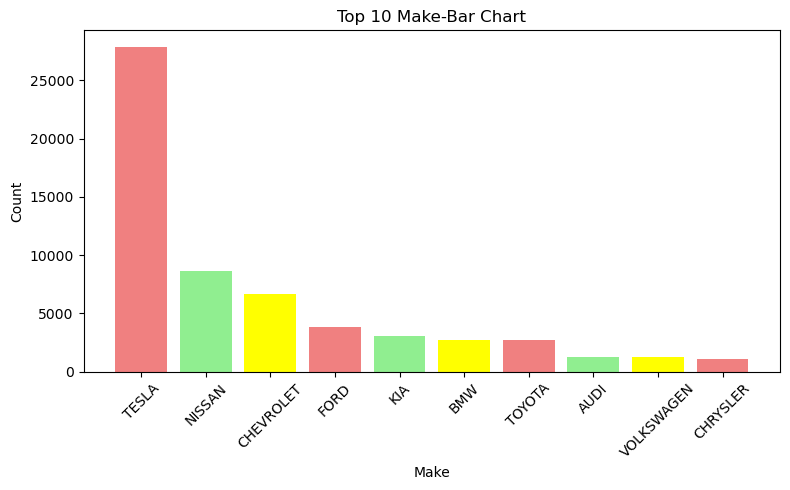

In [54]:
# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(top_10_make.index, top_10_make, color=['lightcoral','lightgreen','yellow'])
plt.title('Top 10 Make-Bar Chart')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
# INFERENCE
### TESLA is the highest sold brand with a sales volume of more than 25K qty
#### It's followed by Nissan, Chevrolet, Ford, KIA and the rest

In [56]:
# Get value counts of EV Type
EVType_counts = data['Electric Vehicle Type'].value_counts()

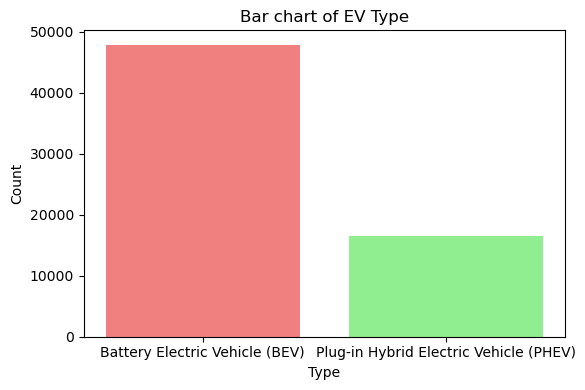

In [57]:
# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(EVType_counts.index, EVType_counts, color=['lightcoral','lightgreen'])
plt.title('Bar chart of EV Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [58]:
# INFERENCE
#####  When it comes to EV type, from the above graph we can clearly see that most number of customers
#### prefer BEV type compared to PHEV

In [59]:
# Get value counts of CAFV Eligiblity
CAFV_counts = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

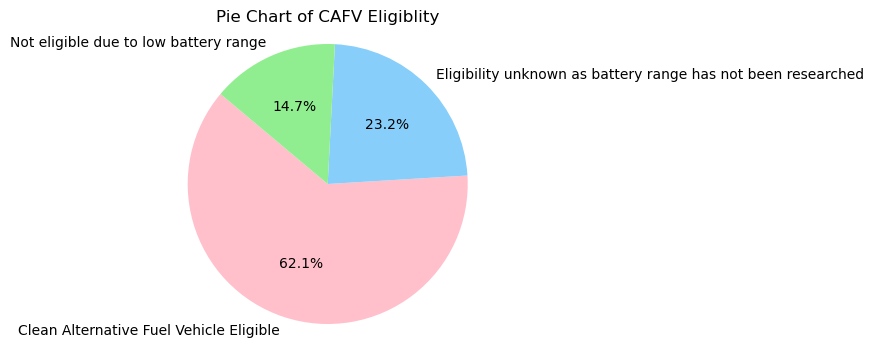

In [60]:
# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(CAFV_counts, labels=CAFV_counts.index, autopct='%1.1f%%', startangle=140,
        colors = ['pink', 'lightskyblue', 'lightgreen'])
plt.title('Pie Chart of CAFV Eligiblity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [61]:
# INFERENCE
####Out of all the EVs sold, 62.1% of the vehicles are considered as eligible for Clean Alternative Fuel Vehicle.

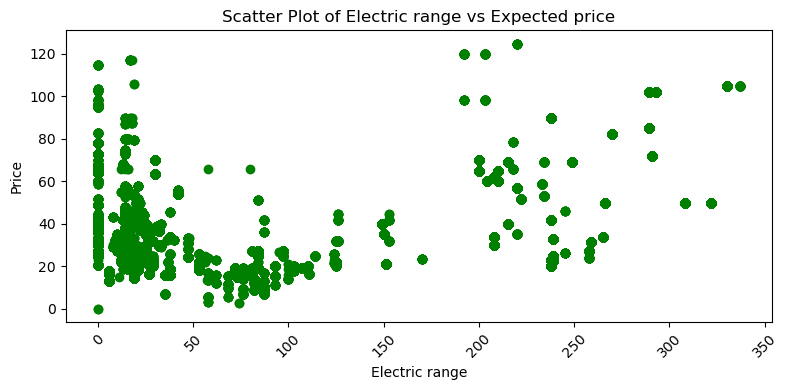

In [62]:
# Create a scatter plot of Electric range vs Price 
plt.figure(figsize=(8, 4))
plt.scatter(data['Electric Range'], data['Expected Price ($1k)'], color='green')
plt.title('Scatter Plot of Electric range vs Expected price')
plt.xlabel('Electric range')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
# INFERENCE 
###   From the above scatter plot which shows the relation between Electric range and Expected price, 
## we don't see enough evidence to confirm if the price of the vehicle is completely dependent on the Electric range
#### which the vehicle offers

In [64]:
# Get value counts of Electric range Category 
ERC_counts = data['Electric_Range_Category'].value_counts()


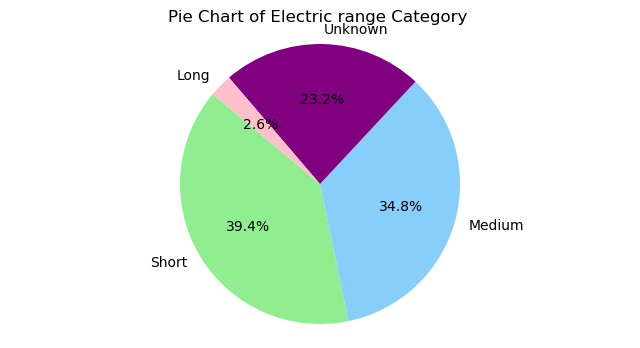

In [65]:
# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(ERC_counts, labels=ERC_counts.index, autopct='%1.1f%%', startangle=140,
        colors = ['lightgreen', 'lightskyblue', 'purple','pink'])
plt.title('Pie Chart of Electric range Category ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [66]:
# Inference 

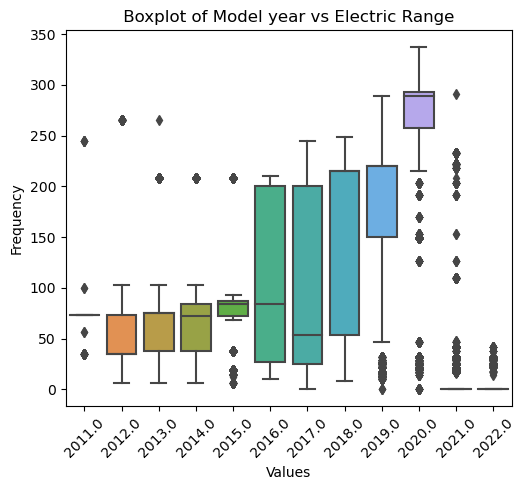

In [67]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x = data['Model Year'], y = data['Electric Range'])
plt.title(' Boxplot of Model year vs Electric Range ')
plt.xlabel('Values')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.tight_layout()


In [68]:
## INFERENCE 
#The evolution of EV Vehicles has seen a remarkable improvement in the Electric range offered across years since it's inception.
#In the year 2012 the vehicle with highest electric range offered was 100 km (or) m, whereas in 2022 the vehicle with highest
#electric range offered was more than 300 km (or) m.

In [69]:
# Calculate the top 10 makes by average electric range
top_makes = data.groupby('Make')['Electric Range'].mean().nlargest(10).index

In [70]:
# Filter the DataFrame to include only the top 10 makes
data_top_makes = data[data['Make'].isin(top_makes)]

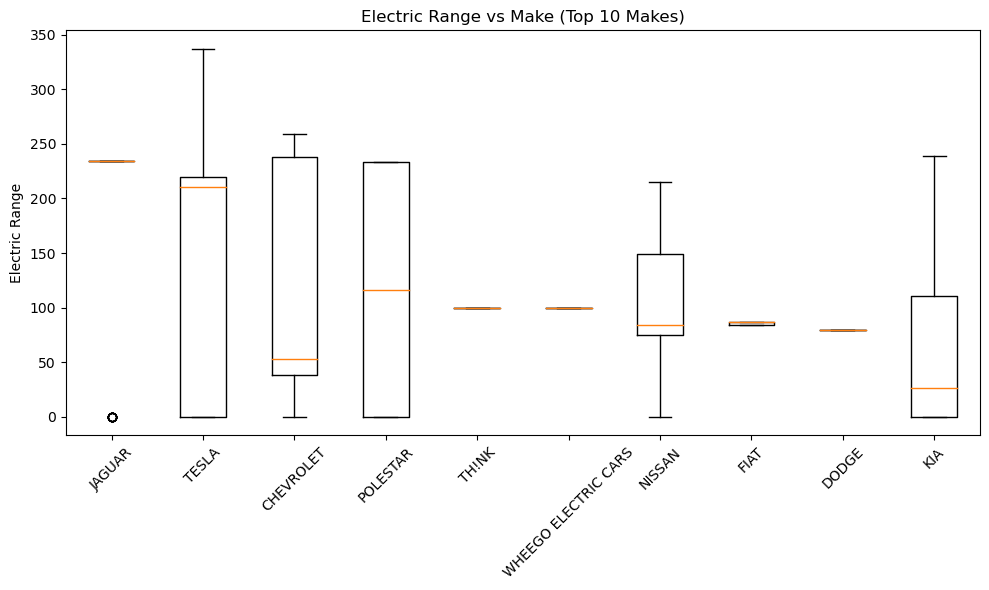

In [71]:
# Step 3: Create the boxplot
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Electric Range vs Make (Top 10 Makes)')
plt.ylabel('Electric Range')
plt.boxplot([data_top_makes[data_top_makes['Make'] == make]['Electric Range'] for make in top_makes], labels=top_makes)
plt.tight_layout()

In [72]:
# INFERENCE
###Tesla offers the highest electrical range of 340 km (or) m

In [73]:
###############################################################################################################################

In [74]:
### MODEL DEVELOPMENT

In [75]:
data= data.drop(['ID','VIN (1-10)','Vehicle Location','Electric Utility','County','City','Model',
                 'State','Legislative District'], axis=1)
# dropping the above columns after considering feature importance and feature reduction factors 

In [76]:
data.head()

,Model Year,Make,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Expected Price ($1k),latitude,longitude,Location,Electric_Range_Category
0,2020.0,TESLA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,50.00,-122.287614,47.838740,"Snohomish, LYNNWOOD, WA",Long
1,2011.0,NISSAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,15.00,-122.414936,48.709388,"Skagit, BELLINGHAM, WA",Short
2,2015.0,BMW,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,18.00,-122.396286,47.293138,"Pierce, TACOMA, WA",Short
3,2013.0,CHEVROLET,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,33.90,-122.024951,47.670286,"King, REDMOND, WA",Short
4,2019.0,CHEVROLET,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,41.78,-122.321062,47.103797,"Pierce, PUYALLUP, WA",Medium


In [77]:
##########################################################################################################################

In [78]:
###### MODEL 1: LINEAR REGRESSON WITH LABEL ENCODING 

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [80]:
### CONVERT CATEGORICAL TO NUMERIC  BY LABEL ENCODING

In [81]:
def convert_categorical_to_numeric(dataframe):
    label_encoder = LabelEncoder()
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            dataframe[column] = label_encoder.fit_transform(dataframe[column])

In [82]:
convert_categorical_to_numeric(data)


In [83]:
# Splitting data into Independent and Dependent Variable
X = data.drop('Expected Price ($1k)', axis=1)
y = data['Expected Price ($1k)']

In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


In [85]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [86]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [87]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.5913322037139682
Mean Squared Error (MSE): 214.983726252875
Root Mean Squared Error (RMSE): 14.66
Mean Absolute Error (MAE): 11.42


In [88]:
################################################################################################################################

In [89]:
###### MODEL 2 : LINEAR REGRESSION USING DUMMIES ENCODING / ONE HOT ENCODING

In [90]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Make'])


In [91]:
# Split into features and target variable
X = data_encoded.drop(['Expected Price ($1k)','Location'], axis=1)
y = data_encoded['Expected Price ($1k)']

In [92]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [94]:
# Make predictions
y_pred = model.predict(X_test)

In [95]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.8252971598387914
Mean Squared Error (MSE): 91.68837812445555
Root Mean Squared Error (RMSE): 9.58
Mean Absolute Error (MAE): 6.82


In [96]:
##############################################################################################################################

In [97]:
##### MODEL 3 : LINEAR REGRESSION WITH STANDARDIZED VALUE

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
#Standardize the selected columns
selected_columns = ['Electric Range']  
scaler = StandardScaler()
data[selected_columns] = scaler.fit_transform(data[selected_columns])

In [100]:
# Split into features and target variable
X = data.drop(['Expected Price ($1k)','latitude','longitude','Location','Electric_Range_Category'], axis=1)
y = data['Expected Price ($1k)']

In [101]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [103]:
# Make predictions
y_pred = model.predict(X_test_processed)

NameError: name 'X_test_processed' is not defined

In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

In [ ]:
##############################################################################################################################3

In [ ]:
### MODEL 4 : RANDOM FOREST REGRESSION

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Split into features and target variable
X = data_encoded.drop(['Expected Price ($1k)','Location'], axis=1)
y = data_encoded['Expected Price ($1k)']

In [ ]:
# Split into features and target variable
#X = data.drop(['Expected Price ($1k)'], axis=1)
#y = data['Expected Price ($1k)']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Random Forest Regression model
# You can adjust hyperparameters like n_estimators, max_depth, etc., as needed
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

In [ ]:
# Create a DataFrame of actual and predicted prices
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Display a sample of the results DataFrame
sample_results_df = results_df.sample(n=5, random_state=0)  # Displaying a sample of 5 rows

print(sample_results_df)

In [ ]:
plt.scatter(y_test, y_pred, marker='x',color='green', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter plot with Regression line (Random forest model) ')
plt.legend()
plt.show()

In [ ]:
###############################################################################################################################

In [ ]:
#### MODEL 5: GRADIENT BOOSTING 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Split into features and target variable
X = data_encoded.drop(['Expected Price ($1k)','Location'], axis=1)
y = data_encoded['Expected Price ($1k)']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
# Train the Gradient Boosting Regressor on the training data
gb_regressor.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = gb_regressor.predict(X_test)

In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

In [ ]:
#############################################################################################################################

In [ ]:
#### MODEL 6 : K-NEAREST NEIGHBOUR MODEL (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the KNN regression model
k = 5  # Number of neighbors (you can adjust this value)
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

In [ ]:
#############################################################################################################################

In [ ]:
## MODEL 7 : DECISION TREE REGRESSOR 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=5)  # You can adjust the max_depth parameter
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

In [ ]:
###############################################################################################################################

In [ ]:
## MODEL 8 :GRADIENT BOOSTING WITH SELECTIVE INDEPENDENT VARIABLE

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# Get the design matrix (X) for the predictors
X = data[['Expected Price ($1k)', 'Model Year', 'Electric Range','latitude','longitude','Electric_Range_Category',
          'Location','Make' ,'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Vehicle Type' ]]

In [ ]:
# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [ ]:
# Display the VIF matrix
print(vif)

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(vif.set_index('Variable'), annot=True, cmap='plasma')
plt.title('VIF Matrix')
plt.show()

In [ ]:
# Split into features and target variable
# Select only the predictor variables (independent features) having VIF < 10
X = data[['Location','Make' ,'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Vehicle Type'] ]
y = data_encoded['Expected Price ($1k)']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
# Train the Gradient Boosting Regressor on the training data
gb_regressor.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = gb_regressor.predict(X_test)

In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

In [104]:
###############################################################################################################################

In [105]:
### MODEL 9 : RANDOM FOREST WITH VIF SCORE 

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
# Split into features and target variable
# Select only the predictor variables (independent features) having VIF < 10
X = data[['Location','Make' ,'Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Vehicle Type'] ]
y = data_encoded['Expected Price ($1k)']

In [108]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Create and train the Random Forest Regression model
# You can adjust hyperparameters like n_estimators, max_depth, etc., as needed
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [110]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [111]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [112]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.7947128591397639
Mean Squared Error (MSE): 107.73977674268555
Root Mean Squared Error (RMSE): 10.38
Mean Absolute Error (MAE): 6.88


In [113]:
############################################################################################################################

In [114]:
# model 10 : linear regression with PCA analysis

In [115]:
from sklearn.decomposition import PCA

In [116]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [117]:
# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [118]:
###Get the loadings
loadings = pca.components_

In [119]:
# Print a sample of the transformed data
print("Sample of PCA-transformed training data:")
print(X_train_pca[:5])  # Print the first 5 rows

Sample of PCA-transformed training data:
[[222.31028932   5.84172148]
 [-67.72945703  -7.33602661]
 [165.3191318    8.99782524]
 [100.26975663  -7.83062572]
 [-71.71202562  -1.3306437 ]]


In [120]:
### Calculate significance
significance = np.abs(loadings) / np.sum(np.abs(loadings), axis=1)[:, np.newaxis]

In [121]:
# Step 4: Create a bar chart for each component
num_variables = X.shape[1]
variables = range(1, num_variables + 1)

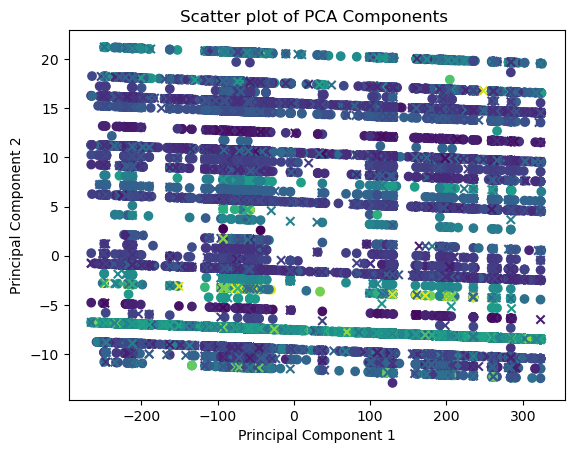

In [122]:
# Scatter plot with color variation
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', label='Train Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', marker='x', label='Test Data')

# Add labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of PCA Components ')


# Show the plot
plt.show()

In [123]:
# Initialize and train linear regression model
regressor = LinearRegression()
regressor.fit(X_train_pca, y_train)

LinearRegression()

In [124]:
# Predict on the test set
y_pred = regressor.predict(X_test_pca)

In [125]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.313309541020113
Mean Squared Error (MSE): 361.24029100268746
Root Mean Squared Error (RMSE): 19.01
Mean Absolute Error (MAE): 15.71


In [126]:
############################################################################################################################

In [127]:
### model 10: support vector regression 

In [128]:
from sklearn.svm import SVR

In [129]:
# Build Support Vector Regression model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

SVR()

In [130]:
# Make predictions
y_train_pred = svr_model.predict(X_train)
y_test_pred = svr_model.predict(X_test)

In [131]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.313309541020113
Mean Squared Error (MSE): 361.24029100268746
Root Mean Squared Error (RMSE): 19.01
Mean Absolute Error (MAE): 15.71


In [132]:
############################################################################################################################

In [133]:
# MODEL 11 : linear regression with log transforamtion 

In [134]:
# Check the unique values and NaN values in 'Electric Range' column
print(data['Electric Range'].describe())
print("\nNumber of NaN values:", data['Electric Range'].isnull().sum())

# Check if there are any negative values
negative_values_count = (data['Electric Range'] < 0).sum()
print("\nNumber of negative values:", negative_values_count)

count    6.435300e+04
mean     8.932436e-17
std      1.000008e+00
min     -1.027436e+00
25%     -8.929408e-01
50%     -3.261406e-01
75%      1.038023e+00
max      2.210050e+00
Name: Electric Range, dtype: float64

Number of NaN values: 0

Number of negative values: 38655


In [137]:
selected_columns = ['Electric Range']

In [148]:
# Add a small constant to avoid zero or negative values
small_constant = 1e-10  # Adjust as needed
data[selected_columns] += small_constant

In [151]:
# Apply log transformation
data[selected_columns] = np.log(data[selected_columns])

C:\Users\RAJESH KUMAR\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [152]:
# Drop rows with NaN values
data.dropna(inplace=True)

# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)

In [153]:
# Splitting data into Independent and Dependent Variable
X = data.drop(['Expected Price ($1k)','Electric Range','latitude','longitude'], axis=1)
y = data['Expected Price ($1k)']

In [154]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [155]:
# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [156]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [157]:
data = create_electric_range_category(data, column='Electric Range')

In [158]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('R Square : ', r2)
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R Square :  0.3694014935411516
Mean Squared Error (MSE): 280.74743065400816
Root Mean Squared Error (RMSE): 16.76
Mean Absolute Error (MAE): 13.76


In [159]:
##############################################################################################################################

In [160]:
###  MODEL EVALUATION

In [161]:
# Create a list of model names and their corresponding metrics
models = ['LINEAR REGRESSION ', 'LINEAR REGRESSION(dummies) ', 'LINEAR REGRESSION (STANDARDIZED)','RANDOM FOREST',
          'GRADIENT BOOST','KNN','DECISION TREE','GRADIENT BOOST(VIF SCORE)','RANDOM FOREST(VIF SCORE)',
          'LINEAR REGRESSION(PCA)','LINEAR REGRESSION(LOG TRANSFORMATION)']
r2_scores= [0.59,0.82,0.49,0.97,0.93,0.97,0.87,0.79,0.79,0.31,0.56] 
rmse_scores = [14.66,9.58,16.28,3.53,5.72,3.65,8.25,10.37,10.38,19.01,15.20] 

In [162]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model Name': models,
    'R2':r2_scores,
     'RMSE': rmse_scores
})

In [163]:
# Display the results table
print(results_df)

                               Model Name    R2   RMSE
0                      LINEAR REGRESSION   0.59  14.66
1             LINEAR REGRESSION(dummies)   0.82   9.58
2        LINEAR REGRESSION (STANDARDIZED)  0.49  16.28
3                           RANDOM FOREST  0.97   3.53
4                          GRADIENT BOOST  0.93   5.72
5                                     KNN  0.97   3.65
6                           DECISION TREE  0.87   8.25
7               GRADIENT BOOST(VIF SCORE)  0.79  10.37
8                RANDOM FOREST(VIF SCORE)  0.79  10.38
9                  LINEAR REGRESSION(PCA)  0.31  19.01
10  LINEAR REGRESSION(LOG TRANSFORMATION)  0.56  15.20


In [164]:
import pickle
with open("rf_regressor.pkl","wb") as file:
    pickle.dump(model,file)